# Week4 - Lab

Take a look at these toy datasets. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv', index_col=0)
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv', index_col=0)

In [3]:
data1.head()

,X,y
0,50,147
1,82,246
2,66,207
3,35,105
4,81,240


In [4]:
X = np.array(data1['X']).reshape(-1,1)
y = np.array(data1['y']).reshape(-1,1)

X.shape, y.shape

((100, 1), (100, 1))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 80
Test samples: 20


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
import statsmodels.api as smf

simpleModel = smf.OLS(X_train, y_train).fit()
print(simpleModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.745e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):                   3.42e-102
Time:                        22:15:38   Log-Likelihood:                         -195.88
No. Observations:                  80   AIC:                                      393.8
Df Residuals:                      79   BIC:                                      396.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:
import statsmodels.api as smf

simpleModel = smf.OLS(X_test, y_test).fit()

print(simpleModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.219e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):                    3.81e-28
Time:                        22:15:42   Log-Likelihood:                         -46.212
No. Observations:                  20   AIC:                                      94.42
Df Residuals:                      19   BIC:                                      95.42
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

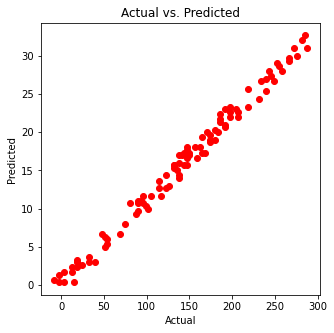

array([[130.32830983, 119.65842812, 124.99336898, ..., 128.32770701,
        130.32830983, 129.32800842],
       [229.32830983, 218.65842812, 223.99336898, ..., 227.32770701,
        229.32830983, 228.32800842],
       [190.32830983, 179.65842812, 184.99336898, ..., 188.32770701,
        190.32830983, 189.32800842],
       ...,
       [157.32830983, 146.65842812, 151.99336898, ..., 155.32770701,
        157.32830983, 156.32800842],
       [142.32830983, 131.65842812, 136.99336898, ..., 140.32770701,
        142.32830983, 141.32800842],
       [130.32830983, 119.65842812, 124.99336898, ..., 128.32770701,
        130.32830983, 129.32800842]])

In [15]:
yhat = simpleModel.predict(X)
resid = y - yhat
plt.figure(figsize=(5,5))
plt.plot(y, yhat, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
resid

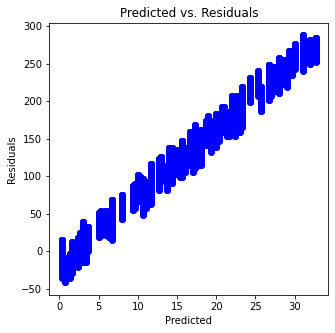

In [16]:
plt.figure(figsize=(5,5))
plt.plot(yhat, resid, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residuals')
plt.show()

In [17]:
simpleModel.rsquared

0.998443985883014

In [18]:
data2.head()

,X1,X2,y
0,50,B,2510
1,82,B,6738
2,66,B,4355
3,35,A,2225
4,81,A,7560


In [20]:
data2['X2'].unique()

array(['B', 'A'], dtype=object)

In [23]:
dummies = pd.get_dummies(data2['X2'], prefix='X2')
data2 = pd.concat([data2, dummies], axis=1)
data2 = data2.drop('X2', axis=1)
print(data2)


    X1     y  X2_A  X2_B
0   50  2510     0     1
1   82  6738     0     1
2   66  4355     0     1
3   35  2225     1     0
4   81  7560     1     0
..  ..   ...   ...   ...
95  98  9615     0     1
96   9  1066     1     0
97  56  4139     1     0
98  50  2502     0     1
99  53  3815     1     0

[100 rows x 4 columns]


In [24]:
y = data2.y
features = ['X1','X2_A','X2_B']
X = data2[features]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      100 non-null    int64
 1   X2_A    100 non-null    uint8
 2   X2_B    100 non-null    uint8
dtypes: int64(1), uint8(2)
memory usage: 1.8 KB


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 80
Test samples: 20


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_predictions = model.predict(X_test)
y_predictions

array([5224.60135205,  942.21236383, 6081.07914969, 6322.61640569,
       3277.36201406, 5414.92975152,   -9.42963355, 2369.6753599 ,
        993.42122035, 3467.69041354, 4082.63095519, 3467.69041354,
        232.10762244, 1469.24221904, 2611.2126159 , 7508.54214576,
       1945.06321773, 3606.8099565 , 4990.31760935, 8079.52734419])

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predictions)
mse

352801.4080550963

In [33]:
rmse = np.sqrt(mse)
rmse

593.9708814875493

In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predictions)
r2

0.9410945290066888

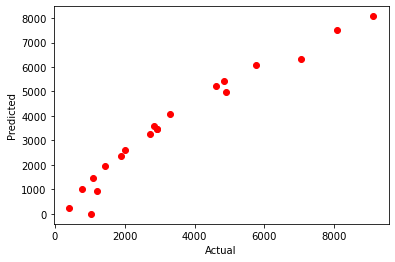

In [35]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

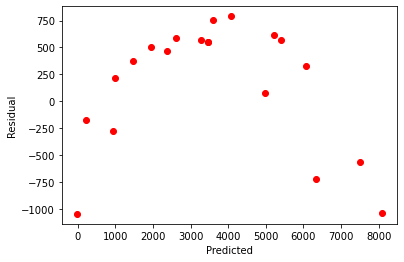

In [36]:
plt.plot(y_predictions, y_predictions - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()